**Linear Regression on Property Cost Prediction**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Mount Google Drive

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
drive.flush_and_unmount()

In [29]:
#Import Dataset

dataset = pd.read_excel('/content/drive/My Drive/ML and AI/Assignments/Dataset/Flats Price Dataset/Linear Regression.xlsx')
#dataset = pd.read_excel('/content/Dataset/Linear Regression.xlsx')
dataset.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [30]:
dataset.dtypes

price            int64
sqft_living      int64
bedrooms         int64
bathrooms      float64
floors         float64
dtype: object

In [35]:
dataset.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.160300e+04,21603.000000,21603.000000,21603.000000,21603.000000
mean,5.379860e+05,2076.369625,3.369902,2.112797,1.494052
std,3.519776e+05,903.098397,0.929142,0.764495,0.539886
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.215000e+05,1421.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,5.300000e+06,7880.000000,33.000000,7.500000,3.500000


In [32]:
#Check for missing values
print(dataset.count())
dataset = dataset[dataset['sqft_living'] < 8000]
dataset.count()
#dataset.isna().sum()

price          21613
sqft_living    21613
bedrooms       21613
bathrooms      21613
floors         21613
dtype: int64


price          21603
sqft_living    21603
bedrooms       21603
bathrooms      21603
floors         21603
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26142baa90>,
      dtype=object)

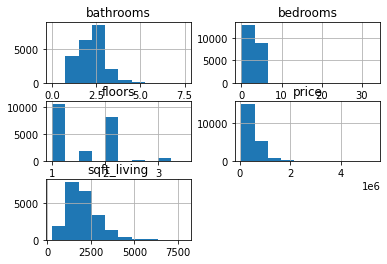

In [33]:
8#Perform Basic EDA

dataset.hist()

In [34]:
#Get the correlation

dataset.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.694440,0.309206,0.519279,0.262134
sqft_living,0.694440,1.000000,0.578216,0.750893,0.355691
bedrooms,0.309206,0.578216,1.000000,0.514447,0.174464
bathrooms,0.519279,0.750893,0.514447,1.000000,0.501821
floors,0.262134,0.355691,0.174464,0.501821,1.000000


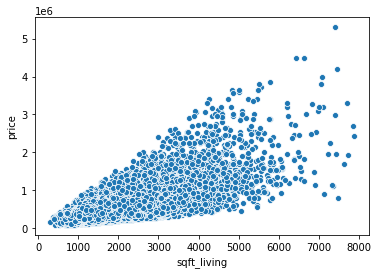

In [36]:
sns.scatterplot(dataset['sqft_living'], dataset['price'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f26136f1240>],
 'caps': [<matplotlib.lines.Line2D at 0x7f26138d3dd8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2613b0a8d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2613a7f080>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f261384a6a0>,
  <matplotlib.lines.Line2D at 0x7f261398d358>]}

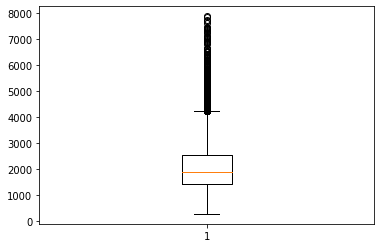

In [38]:
plt.boxplot(dataset.sqft_living)

In [39]:
#Assign and X and y dataset

X = dataset[['sqft_living']]
X.head()

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


In [40]:
Y = dataset[['price']]
Y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


Text(0, 0.5, 'price')

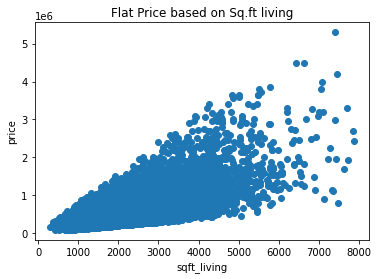

In [41]:
#Visualize the scatterplot

plt.scatter(X, Y)
plt.title('Flat Price based on Sq.ft living')
plt.xlabel('sqft_living')
plt.ylabel('price')

In [42]:
#Divide the dataset in to training and test dataset

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [43]:
#Check the shapes and sizes to understand and verify that the splits has been done in 20-80% ratio

print("Dataset Shape", dataset.shape)
print("X_train Shape", X_train.shape)
print("X_test Shape", X_test.shape)
print("Y_train Shape", Y_train.shape)
print("Y_test Shape", Y_test.shape)

Dataset Shape (21603, 5)
X_train Shape (17282, 1)
X_test Shape (4321, 1)
Y_train Shape (17282, 1)
Y_test Shape (4321, 1)


Text(0, 0.5, 'price')

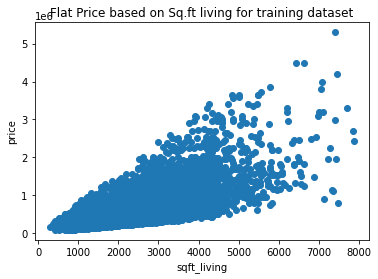

In [44]:
#Visualize the scatterplot for training dataset

plt.scatter(X_train, Y_train)
plt.title('Flat Price based on Sq.ft living for training dataset')
plt.xlabel('sqft_living')
plt.ylabel('price')

Text(0, 0.5, 'price')

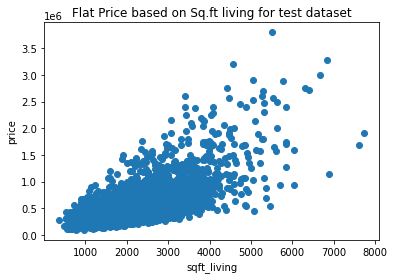

In [45]:
#Visualize the scatterplot for test dataset

plt.scatter(X_test, Y_test)
plt.title('Flat Price based on Sq.ft living for test dataset')
plt.xlabel('sqft_living')
plt.ylabel('price')

In [46]:
#Build the model and train it with fit() method

lin_regression_with_sqft = LinearRegression()
lin_regression_with_sqft.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
lin_regression_with_sqft.coef_

array([[271.64576607]])

In [48]:
lin_regression_with_sqft.intercept_

array([-25255.44321598])

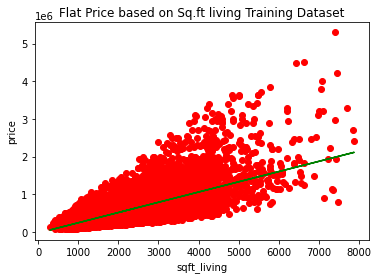

In [49]:
#Visualize the graph to see the linear regression line for training dataset

plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, lin_regression_with_sqft.predict(X_train), color = 'green')
plt.title('Flat Price based on Sq.ft living Training Dataset')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

In [50]:
#Test the model with test dataset

ypred = lin_regression_with_sqft.predict(X_test)
ypred

array([[603061.21369635],
       [455557.56272212],
       [230091.57688674],
       ...,
       [466423.39336479],
       [390362.5788661 ],
       [344182.79863476]])

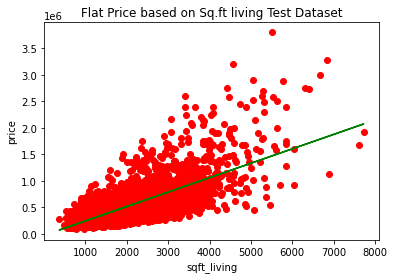

In [51]:
#Visualize the graph to see the linear regression line for test dataset

plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, lin_regression_with_sqft.predict(X_test), color = 'green')
plt.title('Flat Price based on Sq.ft living Test Dataset')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

In [52]:
#Print the performance matrix

print('Mean absolute error: %2f ' % mean_absolute_error(Y_test, ypred))
print('Mean squared error: %2f ' % mean_squared_error(Y_test, ypred))
print('Root mean squared error: %2f ' % np.sqrt(mean_squared_error(Y_test, ypred)))
print('Variance score: %2f ' % explained_variance_score(Y_test, ypred))

#Co-efficient of determination
print('R^2 Square value: ', r2_score(Y_test, ypred))

Mean absolute error: 168908.598541 
Mean squared error: 58815071577.257523 
Root mean squared error: 242518.188137 
Variance score: 0.488241 
R^2 Square value:  0.4881034337007405


In [53]:
#Estimate the cost

RMSE = np.sqrt(mean_squared_error(Y_test, ypred))
r_square = r2_score(Y_test, ypred)

print('The R-square value is ', r_square)
print('The RMSE value is ', RMSE)

The R-square value is  0.4881034337007405
The RMSE value is  242518.18813700866


In [54]:
#Predict unseen values

unseen_pred_price = lin_regression_with_sqft.predict(np.array([[1200]]))
print('Predicted price for a flat with area 1200 sq.ft is ', unseen_pred_price)

Predicted price for a flat with area 1200 sq.ft is  [[300719.47606409]]
